###Environment setup

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d averkiyoliabev/home-equity-line-of-creditheloc

In [ ]:
! mk dir data/
! unzip ./home-equity-line-of-creditheloc.zip -d data/
! mv "./data/heloc_dataset_v1 (1).csv" "./data/heloc_dataset_v1.csv"

In [ ]:
! pip install optbinning

In [9]:
from optbinning import BinningProcess

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###Pre processing

In [11]:
df = pd.read_csv("data/heloc_dataset_v1.csv", sep=",")

In [12]:
variable_names = list(df.columns[1:])

In [13]:
X = df[variable_names].values

In [14]:
# Transform the categorical dichotomic target variable into numerical.

y = df.RiskPerformance.values
mask = y == "Bad"
y[mask] = 1
y[~mask] = 0
y = y.astype(int)

In [15]:
# This dataset has a few special values to avoid
special_codes = [-9, -8, -7]

In [16]:
binning_fit_params = {
    "ExternalRiskEstimate": {"monotonic_trend": "descending"},
    "MSinceOldestTradeOpen": {"monotonic_trend": "descending"},
    "MSinceMostRecentTradeOpen": {"monotonic_trend": "descending"},
    "AverageMInFile": {"monotonic_trend": "descending"},
    "NumSatisfactoryTrades": {"monotonic_trend": "descending"},
    "NumTrades60Ever2DerogPubRec": {"monotonic_trend": "ascending"},
    "NumTrades90Ever2DerogPubRec": {"monotonic_trend": "ascending"},
    "PercentTradesNeverDelq": {"monotonic_trend": "descending"},
    "MSinceMostRecentDelq": {"monotonic_trend": "descending"},
    "NumTradesOpeninLast12M": {"monotonic_trend": "ascending"},
    "MSinceMostRecentInqexcl7days": {"monotonic_trend": "descending"},
    "NumInqLast6M": {"monotonic_trend": "ascending"},
    "NumInqLast6Mexcl7days": {"monotonic_trend": "ascending"},
    "NetFractionRevolvingBurden": {"monotonic_trend": "ascending"},
    "NetFractionInstallBurden": {"monotonic_trend": "ascending"},
    "NumBank2NatlTradesWHighUtilization": {"monotonic_trend": "ascending"}
}

In [17]:
binning_process = BinningProcess(variable_names, special_codes=special_codes,
                                 binning_fit_params=binning_fit_params)

In [18]:
clf1 = Pipeline(steps=[('binning_process', binning_process),
                      ('classifier', LogisticRegression(solver="lbfgs"))])

clf2 = LogisticRegression(solver="lbfgs",max_iter=5000)

clf3 = GradientBoostingClassifier()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
clf1.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


Pipeline(steps=[('binning_process',
                 BinningProcess(binning_fit_params={'AverageMInFile': {'monotonic_trend': 'descending'},
                                                    'ExternalRiskEstimate': {'monotonic_trend': 'descending'},
                                                    'MSinceMostRecentDelq': {'monotonic_trend': 'descending'},
                                                    'MSinceMostRecentInqexcl7days': {'monotonic_trend': 'descending'},
                                                    'MSinceMostRecentTradeOpen': {'monotonic_trend': 'descen...
                                                'MaxDelqEver', 'NumTotalTrades',
                                                'NumTradesOpeninLast12M',
                                                'PercentInstallTrades',
                                                'MSinceMostRecentInqexcl7days',
                                                'NumInqLast6M',
                                                'NumInqLast6Mexcl7days',
                                                'NetFractionRevolvingBurden',
                                                'NetFractionInstallBurden',
                                                'NumRevolvingTradesWBalance',
                                                'NumInstallTradesWBalance',
                                                'NumBank2NatlTradesWHighUtilization',
                                                'PercentTradesWBalance'])),
                ('classifier', LogisticRegression())])

In [29]:
clf2.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
clf3.fit(X_train, y_train)

GradientBoostingClassifier()

In [23]:
y_pred = clf1.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68      1004
           1       0.70      0.74      0.72      1088

    accuracy                           0.70      2092
   macro avg       0.70      0.70      0.70      2092
weighted avg       0.70      0.70      0.70      2092



/usr/local/lib/python3.12/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


In [31]:
y_pred = clf2.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.66      0.66      1004
           1       0.69      0.70      0.69      1088

    accuracy                           0.68      2092
   macro avg       0.68      0.68      0.68      2092
weighted avg       0.68      0.68      0.68      2092



In [25]:
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1004
           1       0.70      0.75      0.73      1088

    accuracy                           0.70      2092
   macro avg       0.70      0.70      0.70      2092
weighted avg       0.70      0.70      0.70      2092



In [26]:

probs = clf1.predict_proba(X_test)
preds = probs[:,1]
fpr1, tpr1, threshold = roc_curve(y_test, preds)
roc_auc1 = auc(fpr1, tpr1)

probs = clf2.predict_proba(X_test)
preds = probs[:,1]
fpr2, tpr2, threshold = roc_curve(y_test, preds)
roc_auc2 = auc(fpr2, tpr2)

probs = clf3.predict_proba(X_test)
preds = probs[:,1]
fpr3, tpr3, threshold = roc_curve(y_test, preds)
roc_auc3 = auc(fpr3, tpr3)

/usr/local/lib/python3.12/dist-packages/optbinning/binning/transformations.py:38: RuntimeWarning: invalid value encountered in log
  return np.log((1. / event_rate - 1) * n_event / n_nonevent)


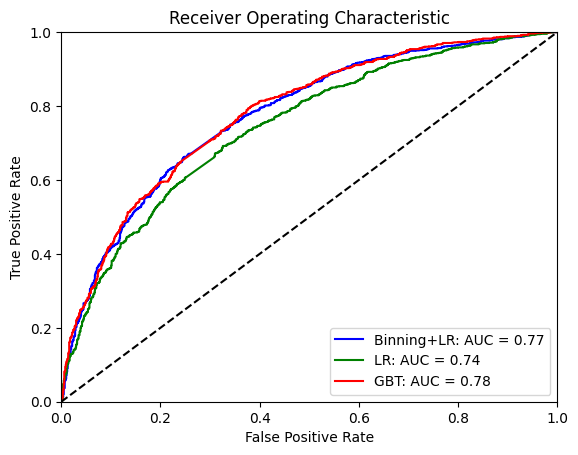

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label='Binning+LR: AUC = {0:.2f}'.format(roc_auc1))
plt.plot(fpr2, tpr2, 'g', label='LR: AUC = {0:.2f}'.format(roc_auc2))
plt.plot(fpr3, tpr3, 'r', label='GBT: AUC = {0:.2f}'.format(roc_auc3))
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()